In [21]:
import pandas as pd
import numpy as np
import os
import pickle
import scipy.stats as st
import matplotlib.pyplot as plt


In [84]:
loadpath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\by_session\verify_npc_analysis'

svc_results={}
decoder_results=os.listdir(loadpath)

for ii,ff in enumerate(decoder_results):
    with open(os.path.join(loadpath,ff),'rb') as handle:
        svc_results[ii]=pickle.load(handle)
    print(ff)

662892_2023-08-21_verify_npc_analysis.pkl
662892_2023-08-23_verify_npc_analysis.pkl
662892_2023-08-24_verify_npc_analysis.pkl
666986_2023-08-17_verify_npc_analysis.pkl
667252_2023-09-27_verify_npc_analysis.pkl
667252_2023-09-28_verify_npc_analysis.pkl
668755_2023-08-30_verify_npc_analysis.pkl
668755_2023-08-31_verify_npc_analysis.pkl


In [55]:
# svc_results[0]['time_bins']

In [85]:
# all unique areas in results
all_areas=[]
for sel_session in range(0,len(svc_results)):
    all_areas.append(list(svc_results[sel_session]['block_ids'].keys()))
    
all_areas=np.unique(np.hstack(all_areas))
all_areas

array(['ACAd', 'ACAv', 'AON', 'APN', 'AQ', 'BST', 'CA1', 'CA3', 'CP',
       'DG', 'EPd', 'FRP', 'GU', 'ICd', 'LD', 'LGv', 'LP', 'LSr', 'MB',
       'MOp', 'MOs', 'MPT', 'MRN', 'NPC', 'OLF', 'ORBl', 'ORBvl', 'PAG',
       'POST', 'ProS', 'RSPagl', 'RSPd', 'RSPv', 'SCdg', 'SCig', 'SCiw',
       'SCsg', 'SGN', 'SSp', 'STR', 'SUB', 'VAL', 'VISam', 'VISp',
       'VISpm', 'VPL', 'VPM', 'ZI', 'all', 'ar', 'ccg', 'ec', 'fa',
       'root', 'scwm'], dtype='<U6')

In [97]:
# make into more plottable format

###TODO: make more general for different #'s of things

plot_results={}
plot_shuffle_results={}

timepoints=svc_results[0]['time_bins'][1:]

# label_list=['vis1','vis2','sound1','sound2','True','False']
# label_list=['vis1','sound1','True','False']
label_list=['vis','sound']

# predict=['stim_ids','block_ids','trial_response']
predict=['block_ids']

# areas=['VISp','AUD','LG','MG','MOs','MRN','CP','MOp']
areas=all_areas

n_units=svc_results[0]['unit_numbers']
unit_numbers=np.arange(0,len(n_units))

for sel_session in range(0,len(svc_results)):
    plot_results[sel_session]={}
    plot_shuffle_results[sel_session]={}
    for aa in areas:
        plot_results[sel_session][aa]={}
        plot_shuffle_results[sel_session][aa]={}
        for p in predict:
            plot_results[sel_session][aa][p]={}
            plot_shuffle_results[sel_session][aa][p]={}
            for uu in unit_numbers:
                plot_results[sel_session][aa][p][uu]={}
                plot_shuffle_results[sel_session][aa][p][uu]={}
                for ll in label_list:
                    plot_results[sel_session][aa][p][uu][ll]=np.zeros((len(timepoints),svc_results[sel_session]['n_repeats']))
                    plot_results[sel_session][aa][p][uu][ll][:]=np.nan

                    plot_shuffle_results[sel_session][aa][p][uu][ll]=np.zeros((len(timepoints),svc_results[sel_session]['n_repeats']))
                    plot_shuffle_results[sel_session][aa][p][uu][ll][:]=np.nan

    
# diff table for each timepoint?
# row = session
# columns = ['modality','A_vis','A_aud','B_vis','B_aud','C_vis','C_aud','F_vis','F_aud',]

decoder_acc_session_mean = {}
decoder_acc_session_shuffle_mean = {}
for aa in areas:
    decoder_acc_session_mean[aa]={}
    decoder_acc_session_shuffle_mean[aa]={}
    for p in predict:
        decoder_acc_session_mean[aa][p]={}
        decoder_acc_session_shuffle_mean[aa][p]={}
        for uu in unit_numbers:
            decoder_acc_session_mean[aa][p][uu]={}
            decoder_acc_session_shuffle_mean[aa][p][uu]={}
            for ll in label_list:

                decoder_acc_session_mean[aa][p][uu][ll]=np.zeros((len(timepoints),
                                                               len(svc_results)))
                decoder_acc_session_mean[aa][p][uu][ll][:]=np.nan

                decoder_acc_session_shuffle_mean[aa][p][uu][ll]=np.zeros((len(timepoints),
                                                               len(svc_results)))
                decoder_acc_session_shuffle_mean[aa][p][uu][ll][:]=np.nan
        

for sel_session in range(0,len(svc_results)):
    for p in predict:
        for aa in areas: 
            if aa in svc_results[sel_session][p].keys():
                for tt,tp in enumerate(timepoints):
                    for uu in unit_numbers:
                        for nn in range(0,svc_results[sel_session]['n_repeats']):
                            for ll in label_list:
                                if len(svc_results[sel_session][p][aa])>0:
                                    if len(svc_results[sel_session][p][aa][tt])>0:
                                        if len(svc_results[sel_session][p][aa][tt][uu])>0:
                                            if ll in svc_results[sel_session][p][aa][tt][uu][nn]['cr'].keys():
                                                temp_perf=np.nanmean(
                                                    [svc_results[sel_session][p][aa][tt][uu][nn]['cr'][ll]['precision'],
                                                     svc_results[sel_session][p][aa][tt][uu][nn]['cr'][ll]['recall']]
                                                     )
                                                plot_results[sel_session][aa][p][uu][ll][tt,nn]=temp_perf

                                                temp_shuff_perf=np.nanmean(
                                                    [svc_results[sel_session][p][aa][tt][uu][nn]['shuffle']['cr'][ll]['precision'],
                                                     svc_results[sel_session][p][aa][tt][uu][nn]['shuffle']['cr'][ll]['recall']]
                                                     )
                                                plot_shuffle_results[sel_session][aa][p][uu][ll][tt,nn]=temp_shuff_perf

                            for ll in label_list:
                                if len(svc_results[sel_session][p][aa])>0:                    
                                    decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][uu][ll][tt])
                                    decoder_acc_session_mean[aa][p][uu][ll][tt,sel_session] = decoder_acc_mean

                                    decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][uu][ll][tt])
                                    decoder_acc_session_shuffle_mean[aa][p][uu][ll][tt,sel_session] = decoder_acc_shuffle_mean

                                    
# plot_results[area][label/stimulus][timepoint_idx][ntrials_idx,nunits_idx,n_repeats]

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_13320\2370453181.py:95: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][uu][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_13320\2370453181.py:98: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][uu][ll][tt])


In [33]:
# svc_results[sel_session][p][aa][tt][uu][nn]['cr'][ll]['precision']
# svc_results[sel_session][p][aa][tt][uu][nn]['cr'][ll]['recall']

In [98]:
#compare across areas!
decoder_acc_area_mean={}
decoder_acc_area_sem={}
decoder_acc_area_n={}

for aa in all_areas:
    decoder_acc_area_mean[aa]=np.zeros(len(unit_numbers))
    decoder_acc_area_sem[aa]=np.zeros(len(unit_numbers))
    decoder_acc_area_n[aa]=np.zeros(len(unit_numbers))
    
    for n_unit_idx in unit_numbers:
        decoder_acc_area_mean[aa][n_unit_idx]=np.nanmean(np.hstack([
            decoder_acc_session_mean[aa]['block_ids'][n_unit_idx]['vis'][0],
            decoder_acc_session_mean[aa]['block_ids'][n_unit_idx]['sound'][0]
        ]))

        decoder_acc_area_sem[aa][n_unit_idx]=st.sem(np.hstack([
            decoder_acc_session_mean[aa]['block_ids'][n_unit_idx]['vis'][0],
            decoder_acc_session_mean[aa]['block_ids'][n_unit_idx]['sound'][0]

        ]),nan_policy='omit')

        decoder_acc_area_n[aa][n_unit_idx]=np.sum(~np.isnan(decoder_acc_session_mean[aa]['block_ids'][n_unit_idx]['vis'][0])&
                                        ~np.isnan(decoder_acc_session_mean[aa]['block_ids'][n_unit_idx]['sound'][0]))

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_13320\3543197115.py:12: RuntimeWarning: Mean of empty slice
  decoder_acc_area_mean[aa][n_unit_idx]=np.nanmean(np.hstack([
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [99]:
all_areas

array(['ACAd', 'ACAv', 'AON', 'APN', 'AQ', 'BST', 'CA1', 'CA3', 'CP',
       'DG', 'EPd', 'FRP', 'GU', 'ICd', 'LD', 'LGv', 'LP', 'LSr', 'MB',
       'MOp', 'MOs', 'MPT', 'MRN', 'NPC', 'OLF', 'ORBl', 'ORBvl', 'PAG',
       'POST', 'ProS', 'RSPagl', 'RSPd', 'RSPv', 'SCdg', 'SCig', 'SCiw',
       'SCsg', 'SGN', 'SSp', 'STR', 'SUB', 'VAL', 'VISam', 'VISp',
       'VISpm', 'VPL', 'VPM', 'ZI', 'all', 'ar', 'ccg', 'ec', 'fa',
       'root', 'scwm'], dtype='<U6')

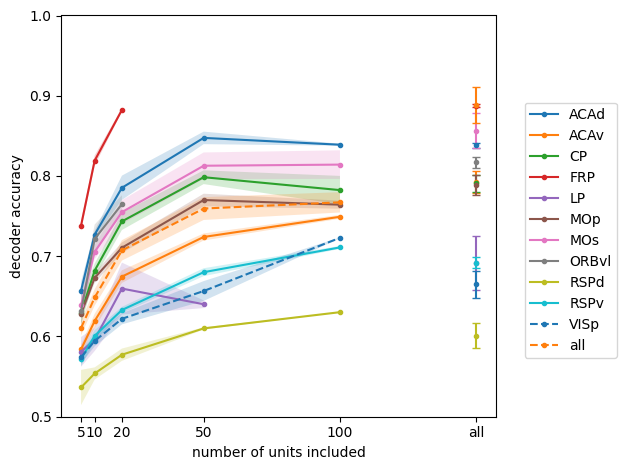

In [101]:
fig,ax=plt.subplots(1,1)

xvect=n_units[:-1]+[n_units[-2]+50]

##TODO: add N recordings to legend

sel_areas=['ACAd','ACAv','CP','FRP','LP','MOp','MOs','ORBvl','RSPd','RSPv','VISp','all']
# sel_areas=all_areas

for ia,aa in enumerate(sel_areas):
    if ia<10:
        set_linestyle='-'
    else:
        set_linestyle='--'

    y=decoder_acc_area_mean[aa]
    err=decoder_acc_area_sem[aa]
    temp_line=ax.plot(xvect[:-1], y[:-1], linestyle=set_linestyle,marker='.',label=aa)
    ax.fill_between(xvect[:-1], y[:-1]-err[:-1], y[:-1]+err[:-1],
        alpha=0.2, edgecolor=None, facecolor=temp_line[0].get_color())
    
    ax.errorbar(xvect[-1],y[-1],yerr=err[-1],color=temp_line[0].get_color(),
                marker='.',capsize=3)
    
    ax.set_xlabel('number of units included')
    ax.set_ylabel('decoder accuracy')
    ax.set_ylim([0.5,1.0])
    ax.set_xticks(xvect)
    ax.set_xticklabels(n_units)
    
# ax.legend(sel_areas,bbox_to_anchor = (1.05, 0.8))
ax.legend(bbox_to_anchor = (1.05, 0.8))
fig.tight_layout()

In [102]:
# compare across areas - barplot

n_unit_idx=2
n_units_incl=svc_results[0]['unit_numbers'][n_unit_idx]

area_block_decoding={}

for aa in all_areas:
    
    if aa=='all':
        continue
    # compile avg prestim decoding per area x session
    area_block_decoding[aa]=np.nanmean(np.vstack([decoder_acc_session_mean[aa]['block_ids'][n_unit_idx]['vis'][0],
                                                  decoder_acc_session_mean[aa]['block_ids'][n_unit_idx]['sound'][0]]),0)
                                            
area_block_decoding=pd.DataFrame(area_block_decoding)
area_block_decoding

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_13320\19846554.py:13: RuntimeWarning: Mean of empty slice
  area_block_decoding[aa]=np.nanmean(np.vstack([decoder_acc_session_mean[aa]['block_ids'][n_unit_idx]['vis'][0],


,ACAd,ACAv,AON,APN,AQ,BST,CA1,CA3,CP,DG,...,VISpm,VPL,VPM,ZI,ar,ccg,ec,fa,root,scwm
0,NaN,NaN,NaN,0.717252,NaN,NaN,NaN,NaN,0.714299,0.564038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.676657,NaN,NaN,NaN,0.779900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6859,0.571247,0.630512
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.572521,0.625811,0.656801,0.750566,NaN,...,0.554924,0.597842,0.617749,0.692796,0.673505,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.598205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.601908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.810807,0.661030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.733713,0.836105,NaN,0.589643,NaN
7,0.759824,0.688187,0.629239,NaN,NaN,NaN,NaN,NaN,0.728895,NaN,...,NaN,NaN,NaN,NaN,NaN,0.671491,NaN,NaN,NaN,NaN


In [103]:
area_block_decoding.columns[(area_block_decoding.isna().sum()<=(len(svc_results)-2))]

Index(['ACAd', 'ACAv', 'CP', 'DG', 'LGv', 'LP', 'MB', 'MOp', 'MOs', 'MPT',
       'MRN', 'OLF', 'ORBl', 'ProS', 'RSPd', 'RSPv', 'SCiw', 'SCsg', 'SSp',
       'VISam', 'VISp', 'ccg', 'root'],
      dtype='object')

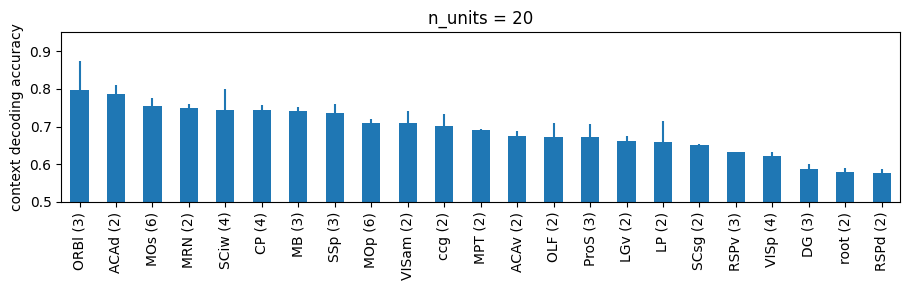

In [104]:
min_n_recs=2

area_means=area_block_decoding.mean()[(area_block_decoding.isna().sum()<=(len(svc_results)-min_n_recs))].sort_values(ascending=False)
area_stds=area_block_decoding.sem()[(area_block_decoding.isna().sum()<=(len(svc_results)-min_n_recs))].loc[area_means.index]
area_n_recs=area_block_decoding.notna().sum()[(area_block_decoding.isna().sum()<=(len(svc_results)-min_n_recs))].loc[area_means.index]

area_labels=[]
for aa in area_means.index:
    area_labels.append(aa+' ('+str(area_n_recs[aa])+')')

fig,ax=plt.subplots(figsize=(len(area_means)*0.4,3))
ax=area_means.plot.bar()
ax.set_xticklabels(area_labels)

ax.errorbar(area_means.index,area_means.values,area_stds.values,linestyle='')

ax.set_ylim([0.5,0.95])
ax.set_ylabel('context decoding accuracy')
ax.set_title('n_units = '+str(n_units_incl))

fig.tight_layout()

In [9]:
import pandas as pd

pd.DataFrame.from_dict(svc_results[2]['block_ids']['FRP'][0][0][0]['cr'])

,sound,vis,accuracy,macro avg,weighted avg
precision,0.861111,0.767123,0.807087,0.814117,0.814117
recall,0.732283,0.881890,0.807087,0.807087,0.807087
f1-score,0.791489,0.820513,0.807087,0.806001,0.806001
support,254.000000,254.000000,0.807087,508.000000,508.000000
